In [56]:
import networkx as nx
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread
%matplotlib inline

In [57]:
a = mmread(r"C:\Users\somaa\Desktop\Networkx_project\soc-karate.mtx")
graph = nx.Graph(a)

In [58]:
print(graph)

Graph with 34 nodes and 78 edges


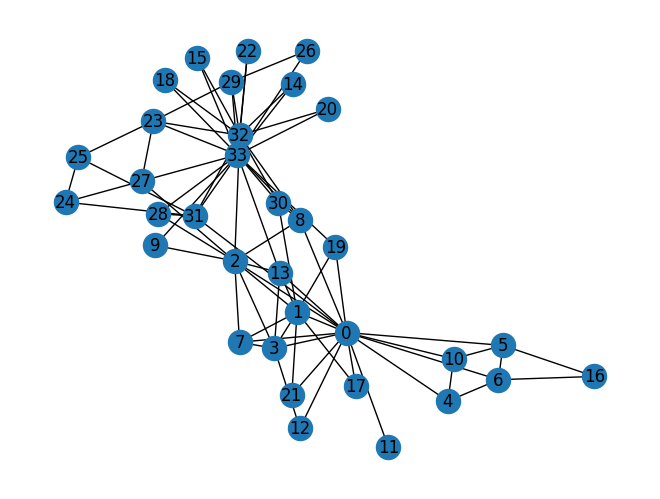

In [59]:
nx.draw(graph,with_labels = True)

In [60]:
DF_re = pd.DataFrame(np.zeros([len(graph.nodes()),len(graph.nodes())]),index=graph.nodes(),columns=graph.nodes())
for col_label,row_label in graph.edges():
    DF_re.loc[col_label,row_label] = 1
    DF_re.loc[row_label,col_label] = 1

In [61]:
print(DF_re)

     0    1    2    3    4    5    6    7    8    9   ...   24   25   26   27  \
0   0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...  0.0  0.0  0.0  0.0   
1   1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  ...  0.0  0.0  0.0  1.0   
3   1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
5   1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
7   1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
9   0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
10  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
11  1.0  0.0  0.0  0.0  0.0 

In [62]:
density = nx.density(graph)
print("Network density:", density)

Network density: 0.13903743315508021


Feature Extraction

1st feature extraction: Eigen vector centrality.

In [63]:
eigenvector__centrality=nx.eigenvector_centrality(graph)

In [64]:
nodes=[]
eigenvector__centralitys=[]

In [65]:
for i, j in eigenvector__centrality.items():
    print(i,' : ',j)
    nodes.append(i)
    eigenvector__centralitys.append(j)

0  :  0.35548349418519426
1  :  0.2659538704545024
2  :  0.3171893899684447
3  :  0.21117407832057056
4  :  0.0759664588165738
5  :  0.07948057788594245
6  :  0.07948057788594245
7  :  0.1709551149803543
8  :  0.22740509147166046
9  :  0.10267519030637756
10  :  0.0759664588165738
11  :  0.05285416945233646
12  :  0.08425192086558085
13  :  0.22646969838808145
14  :  0.10140627846270832
15  :  0.10140627846270832
16  :  0.02363479426059687
17  :  0.0923967566684595
18  :  0.10140627846270832
19  :  0.14791134007618667
20  :  0.10140627846270832
21  :  0.0923967566684595
22  :  0.10140627846270832
23  :  0.15012328691726787
24  :  0.057053735638028055
25  :  0.0592082025027901
26  :  0.07558192219009324
27  :  0.13347932684333308
28  :  0.13107925627221215
29  :  0.13496528673866567
30  :  0.17476027834493088
31  :  0.191036269797917
32  :  0.3086510477336959
33  :  0.37337121301323506


In [66]:
df=pd.DataFrame()

In [67]:
df.index=nodes
df["Eigenvector-centrality"]=eigenvector__centralitys

In [68]:
df

,Eigenvector-centrality
0,0.355483
1,0.265954
2,0.317189
3,0.211174
4,0.075966
5,0.079481
6,0.079481
7,0.170955
8,0.227405
9,0.102675


2nd feature Extraction: betweenness centrality. 

In [69]:
betweenness__centrality = nx.betweenness_centrality(graph)

In [70]:
betweenness__centralitys = []

In [71]:
for i, j in betweenness__centrality.items():
    print(i,' : ',j)
   # nodes.append(i)
    betweenness__centralitys.append(j)

0  :  0.43763528138528146
1  :  0.053936688311688304
2  :  0.14365680615680618
3  :  0.011909271284271283
4  :  0.0006313131313131313
5  :  0.02998737373737374
6  :  0.029987373737373736
7  :  0.0
8  :  0.05592682780182781
9  :  0.0008477633477633478
10  :  0.0006313131313131313
11  :  0.0
12  :  0.0
13  :  0.04586339586339586
14  :  0.0
15  :  0.0
16  :  0.0
17  :  0.0
18  :  0.0
19  :  0.03247504810004811
20  :  0.0
21  :  0.0
22  :  0.0
23  :  0.017613636363636363
24  :  0.0022095959595959595
25  :  0.0038404882154882154
26  :  0.0
27  :  0.02233345358345358
28  :  0.0017947330447330447
29  :  0.0029220779220779218
30  :  0.014411976911976909
31  :  0.13827561327561325
32  :  0.145247113997114
33  :  0.30407497594997596


In [72]:
df["betweenness-centrality"]=betweenness__centralitys

In [73]:
df

,Eigenvector-centrality,betweenness-centrality
0,0.355483,0.437635
1,0.265954,0.053937
2,0.317189,0.143657
3,0.211174,0.011909
4,0.075966,0.000631
5,0.079481,0.029987
6,0.079481,0.029987
7,0.170955,0.000000
8,0.227405,0.055927
9,0.102675,0.000848


3rd feature Extraction: Degree centrality

In [74]:
degree__centrality = nx.degree_centrality(graph)

In [75]:
degree__centralitys = []

In [76]:
for i, j in degree__centrality.items():
    print(i,' : ',j)
   # nodes.append(i)
    degree__centralitys.append(j)

0  :  0.48484848484848486
1  :  0.2727272727272727
2  :  0.30303030303030304
3  :  0.18181818181818182
4  :  0.09090909090909091
5  :  0.12121212121212122
6  :  0.12121212121212122
7  :  0.12121212121212122
8  :  0.15151515151515152
9  :  0.06060606060606061
10  :  0.09090909090909091
11  :  0.030303030303030304
12  :  0.06060606060606061
13  :  0.15151515151515152
14  :  0.06060606060606061
15  :  0.06060606060606061
16  :  0.06060606060606061
17  :  0.06060606060606061
18  :  0.06060606060606061
19  :  0.09090909090909091
20  :  0.06060606060606061
21  :  0.06060606060606061
22  :  0.06060606060606061
23  :  0.15151515151515152
24  :  0.09090909090909091
25  :  0.09090909090909091
26  :  0.06060606060606061
27  :  0.12121212121212122
28  :  0.09090909090909091
29  :  0.12121212121212122
30  :  0.12121212121212122
31  :  0.18181818181818182
32  :  0.36363636363636365
33  :  0.5151515151515151


In [77]:
df["degree-centrality"]=degree__centralitys

In [78]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality
0,0.355483,0.437635,0.484848
1,0.265954,0.053937,0.272727
2,0.317189,0.143657,0.303030
3,0.211174,0.011909,0.181818
4,0.075966,0.000631,0.090909
5,0.079481,0.029987,0.121212
6,0.079481,0.029987,0.121212
7,0.170955,0.000000,0.121212
8,0.227405,0.055927,0.151515
9,0.102675,0.000848,0.060606


4th feature Extraction: closeness centrality

In [79]:
closeness__centrality = nx.closeness_centrality(graph)

In [80]:
closeness__centralitys = []

In [81]:
for i, j in closeness__centrality.items():
    print(i,' : ',j)
   # nodes.append(i)
    closeness__centralitys.append(j)

0  :  0.5689655172413793
1  :  0.4852941176470588
2  :  0.559322033898305
3  :  0.4647887323943662
4  :  0.3793103448275862
5  :  0.38372093023255816
6  :  0.38372093023255816
7  :  0.44
8  :  0.515625
9  :  0.4342105263157895
10  :  0.3793103448275862
11  :  0.36666666666666664
12  :  0.3707865168539326
13  :  0.515625
14  :  0.3707865168539326
15  :  0.3707865168539326
16  :  0.28448275862068967
17  :  0.375
18  :  0.3707865168539326
19  :  0.5
20  :  0.3707865168539326
21  :  0.375
22  :  0.3707865168539326
23  :  0.39285714285714285
24  :  0.375
25  :  0.375
26  :  0.3626373626373626
27  :  0.4583333333333333
28  :  0.4520547945205479
29  :  0.38372093023255816
30  :  0.4583333333333333
31  :  0.5409836065573771
32  :  0.515625
33  :  0.55


In [82]:
df["closeness-centrality"]=closeness__centralitys

In [83]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality
0,0.355483,0.437635,0.484848,0.568966
1,0.265954,0.053937,0.272727,0.485294
2,0.317189,0.143657,0.303030,0.559322
3,0.211174,0.011909,0.181818,0.464789
4,0.075966,0.000631,0.090909,0.379310
5,0.079481,0.029987,0.121212,0.383721
6,0.079481,0.029987,0.121212,0.383721
7,0.170955,0.000000,0.121212,0.440000
8,0.227405,0.055927,0.151515,0.515625
9,0.102675,0.000848,0.060606,0.434211


5th feature Extraction: Node Degree

In [84]:
Node__degree = nx.degree(graph)

In [85]:
Node__degrees = []

In [86]:
for i, j in Node__degree:
    print(i,' : ',j)
   # nodes.append(i)
    Node__degrees.append(j)

0  :  16
1  :  9
2  :  10
3  :  6
4  :  3
5  :  4
6  :  4
7  :  4
8  :  5
9  :  2
10  :  3
11  :  1
12  :  2
13  :  5
14  :  2
15  :  2
16  :  2
17  :  2
18  :  2
19  :  3
20  :  2
21  :  2
22  :  2
23  :  5
24  :  3
25  :  3
26  :  2
27  :  4
28  :  3
29  :  4
30  :  4
31  :  6
32  :  12
33  :  17


In [87]:
df["Node-degree"]=Node__degrees

In [88]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree
0,0.355483,0.437635,0.484848,0.568966,16
1,0.265954,0.053937,0.272727,0.485294,9
2,0.317189,0.143657,0.303030,0.559322,10
3,0.211174,0.011909,0.181818,0.464789,6
4,0.075966,0.000631,0.090909,0.379310,3
5,0.079481,0.029987,0.121212,0.383721,4
6,0.079481,0.029987,0.121212,0.383721,4
7,0.170955,0.000000,0.121212,0.440000,4
8,0.227405,0.055927,0.151515,0.515625,5
9,0.102675,0.000848,0.060606,0.434211,2


6th feature Extraction: Page Rank

In [89]:
page__rank=nx.pagerank(graph)

In [90]:
page__ranks=[]

In [91]:
for i, j in page__rank.items():
    print(i,' : ',j)
   # nodes.append(i)
    page__ranks.append(j)

0  :  0.09700181758983706
1  :  0.052878391037427
2  :  0.05707842304763673
3  :  0.035860643223064786
4  :  0.021979406974834498
5  :  0.02911334166344221
6  :  0.029113341663442205
7  :  0.02449075803950918
8  :  0.029765339186167028
9  :  0.014308950284462798
10  :  0.021979406974834494
11  :  0.009564916863537146
12  :  0.014645186487916188
13  :  0.02953631497720298
14  :  0.014535161524273824
15  :  0.014535161524273824
16  :  0.016785378110253487
17  :  0.01455885977424349
18  :  0.014535161524273824
19  :  0.01960441671193729
20  :  0.014535161524273824
21  :  0.01455885977424349
22  :  0.014535161524273824
23  :  0.03152091531163227
24  :  0.021075455001162945
25  :  0.02100562817474579
26  :  0.015043395360629753
27  :  0.025638803528350497
28  :  0.019572960509438537
29  :  0.026287262837112076
30  :  0.024589336534292478
31  :  0.037156635922679405
32  :  0.07169213006588289
33  :  0.1009179167487121


In [92]:
df["page-rank"]=page__ranks

In [93]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree,page-rank
0,0.355483,0.437635,0.484848,0.568966,16,0.097002
1,0.265954,0.053937,0.272727,0.485294,9,0.052878
2,0.317189,0.143657,0.303030,0.559322,10,0.057078
3,0.211174,0.011909,0.181818,0.464789,6,0.035861
4,0.075966,0.000631,0.090909,0.379310,3,0.021979
5,0.079481,0.029987,0.121212,0.383721,4,0.029113
6,0.079481,0.029987,0.121212,0.383721,4,0.029113
7,0.170955,0.000000,0.121212,0.440000,4,0.024491
8,0.227405,0.055927,0.151515,0.515625,5,0.029765
9,0.102675,0.000848,0.060606,0.434211,2,0.014309


7th feature Extraction: Clustering coefficient

In [94]:
clustering__coefficient = nx.clustering(graph)

In [95]:
clustering__coefficients=[]

In [96]:
for i, j in clustering__coefficient.items():
    print(i,' : ',j)
   # nodes.append(i)
    clustering__coefficients.append(j)

0  :  0.15
1  :  0.3333333333333333
2  :  0.24444444444444444
3  :  0.6666666666666666
4  :  0.6666666666666666
5  :  0.5
6  :  0.5
7  :  1.0
8  :  0.5
9  :  0
10  :  0.6666666666666666
11  :  0
12  :  1.0
13  :  0.6
14  :  1.0
15  :  1.0
16  :  1.0
17  :  1.0
18  :  1.0
19  :  0.3333333333333333
20  :  1.0
21  :  1.0
22  :  1.0
23  :  0.4
24  :  0.3333333333333333
25  :  0.3333333333333333
26  :  1.0
27  :  0.16666666666666666
28  :  0.3333333333333333
29  :  0.6666666666666666
30  :  0.5
31  :  0.2
32  :  0.19696969696969696
33  :  0.11029411764705882


In [97]:
df["clustering-coefficient"]=clustering__coefficients

In [98]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree,page-rank,clustering-coefficient
0,0.355483,0.437635,0.484848,0.568966,16,0.097002,0.150000
1,0.265954,0.053937,0.272727,0.485294,9,0.052878,0.333333
2,0.317189,0.143657,0.303030,0.559322,10,0.057078,0.244444
3,0.211174,0.011909,0.181818,0.464789,6,0.035861,0.666667
4,0.075966,0.000631,0.090909,0.379310,3,0.021979,0.666667
5,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000
6,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000
7,0.170955,0.000000,0.121212,0.440000,4,0.024491,1.000000
8,0.227405,0.055927,0.151515,0.515625,5,0.029765,0.500000
9,0.102675,0.000848,0.060606,0.434211,2,0.014309,0.000000


8th feature Extraction: effective size

In [99]:
effective__size = nx.effective_size(graph)

In [100]:
effective__sizes = []

In [101]:
for i, j in effective__size.items():
    print(i,' : ',j)
   # nodes.append(i)
    effective__sizes.append(j)

0  :  13.75
1  :  6.333333333333334
2  :  7.8
3  :  2.6666666666666665
4  :  1.6666666666666667
5  :  2.5
6  :  2.5
7  :  1.0
8  :  3.0
9  :  2.0
10  :  1.6666666666666667
11  :  1.0
12  :  1.0
13  :  2.6
14  :  1.0
15  :  1.0
16  :  1.0
17  :  1.0
18  :  1.0
19  :  2.3333333333333335
20  :  1.0
21  :  1.0
22  :  1.0
23  :  3.4
24  :  2.3333333333333335
25  :  2.3333333333333335
26  :  1.0
27  :  3.5
28  :  2.3333333333333335
29  :  2.0
30  :  2.5
31  :  5.0
32  :  9.833333333333334
33  :  15.235294117647058


In [102]:
df["effective-size"]=effective__sizes

In [103]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree,page-rank,clustering-coefficient,effective-size
0,0.355483,0.437635,0.484848,0.568966,16,0.097002,0.150000,13.750000
1,0.265954,0.053937,0.272727,0.485294,9,0.052878,0.333333,6.333333
2,0.317189,0.143657,0.303030,0.559322,10,0.057078,0.244444,7.800000
3,0.211174,0.011909,0.181818,0.464789,6,0.035861,0.666667,2.666667
4,0.075966,0.000631,0.090909,0.379310,3,0.021979,0.666667,1.666667
5,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000,2.500000
6,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000,2.500000
7,0.170955,0.000000,0.121212,0.440000,4,0.024491,1.000000,1.000000
8,0.227405,0.055927,0.151515,0.515625,5,0.029765,0.500000,3.000000
9,0.102675,0.000848,0.060606,0.434211,2,0.014309,0.000000,2.000000


9th feature Extraction: load centrality

In [104]:
load__centrality = nx.load_centrality(graph)

In [105]:
load__centralitys=[]

In [106]:
for i, j in load__centrality.items():
    print(i,' : ',j)
   # nodes.append(i)
    load__centralitys.append(j)

0  :  0.43468342276936023
1  :  0.05493607954545455
2  :  0.14834280303030306
3  :  0.014234138257575758
4  :  0.0006313131313131311
5  :  0.029987373737373736
6  :  0.02998737373737374
7  :  0.0
8  :  0.051530934343434365
9  :  0.0007891414141414141
10  :  0.0006313131313131311
11  :  0.0
12  :  0.0
13  :  0.047887731481481496
14  :  0.0
15  :  0.0
16  :  0.0
17  :  0.0
18  :  0.0
19  :  0.03391992845117845
20  :  0.0
21  :  0.0
22  :  0.0
23  :  0.017676767676767676
24  :  0.0023279671717171715
25  :  0.00495580808080808
26  :  0.0
27  :  0.023926767676767675
28  :  0.0017624158249158247
29  :  0.0036497790404040405
30  :  0.014207175925925925
31  :  0.13407512626262627
32  :  0.1476352062289563
33  :  0.29843355429292934


In [107]:
df["load-centrality"]=load__centralitys

In [108]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree,page-rank,clustering-coefficient,effective-size,load-centrality
0,0.355483,0.437635,0.484848,0.568966,16,0.097002,0.150000,13.750000,0.434683
1,0.265954,0.053937,0.272727,0.485294,9,0.052878,0.333333,6.333333,0.054936
2,0.317189,0.143657,0.303030,0.559322,10,0.057078,0.244444,7.800000,0.148343
3,0.211174,0.011909,0.181818,0.464789,6,0.035861,0.666667,2.666667,0.014234
4,0.075966,0.000631,0.090909,0.379310,3,0.021979,0.666667,1.666667,0.000631
5,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000,2.500000,0.029987
6,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000,2.500000,0.029987
7,0.170955,0.000000,0.121212,0.440000,4,0.024491,1.000000,1.000000,0.000000
8,0.227405,0.055927,0.151515,0.515625,5,0.029765,0.500000,3.000000,0.051531
9,0.102675,0.000848,0.060606,0.434211,2,0.014309,0.000000,2.000000,0.000789


10th feature Extraction: average neighbor degree

In [113]:
average__neighbor__degree=nx.average_neighbor_degree(graph)

In [114]:
average__neighbor__degrees=[]

In [115]:
for i, j in average__neighbor__degree.items():
    print(i,' : ',j)
   # nodes.append(i)
    average__neighbor__degrees.append(j)

0  :  4.3125
1  :  5.777777777777778
2  :  6.6
3  :  7.666666666666667
4  :  7.666666666666667
5  :  6.25
6  :  6.25
7  :  10.25
8  :  11.8
9  :  13.5
10  :  7.666666666666667
11  :  16.0
12  :  11.0
13  :  11.6
14  :  14.5
15  :  14.5
16  :  4.0
17  :  12.5
18  :  14.5
19  :  14.0
20  :  14.5
21  :  12.5
22  :  14.5
23  :  8.0
24  :  4.333333333333333
25  :  4.666666666666667
26  :  10.5
27  :  8.75
28  :  11.0
29  :  9.0
30  :  10.75
31  :  9.0
32  :  5.083333333333333
33  :  3.823529411764706


In [116]:
df["average-neighbor-degree"]=average__neighbor__degrees

In [117]:
df

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree,page-rank,clustering-coefficient,effective-size,load-centrality,average-neighbor-degree
0,0.355483,0.437635,0.484848,0.568966,16,0.097002,0.150000,13.750000,0.434683,4.312500
1,0.265954,0.053937,0.272727,0.485294,9,0.052878,0.333333,6.333333,0.054936,5.777778
2,0.317189,0.143657,0.303030,0.559322,10,0.057078,0.244444,7.800000,0.148343,6.600000
3,0.211174,0.011909,0.181818,0.464789,6,0.035861,0.666667,2.666667,0.014234,7.666667
4,0.075966,0.000631,0.090909,0.379310,3,0.021979,0.666667,1.666667,0.000631,7.666667
5,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000,2.500000,0.029987,6.250000
6,0.079481,0.029987,0.121212,0.383721,4,0.029113,0.500000,2.500000,0.029987,6.250000
7,0.170955,0.000000,0.121212,0.440000,4,0.024491,1.000000,1.000000,0.000000,10.250000
8,0.227405,0.055927,0.151515,0.515625,5,0.029765,0.500000,3.000000,0.051531,11.800000
9,0.102675,0.000848,0.060606,0.434211,2,0.014309,0.000000,2.000000,0.000789,13.500000


In [118]:
#This is the data we required.

Z-score normalization

In [119]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler().fit_transform(df)

In [126]:
df1=pd.DataFrame(scaler)

In [128]:
df1.columns=df.columns

In [129]:
df1

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree,page-rank,clustering-coefficient,effective-size,load-centrality,average-neighbor-degree
0,2.341089,4.253474,2.987091,2.006170,2.987091,3.100243,-1.228981,3.051464,4.258164,-1.449544
1,1.338579,0.107306,1.154803,0.828095,1.154803,1.076375,-0.693335,0.903374,0.119129,-1.048619
2,1.912290,1.076803,1.416559,1.870391,1.416559,1.269023,-0.953042,1.328165,1.137211,-0.823645
3,0.725182,-0.346833,0.369537,0.539384,0.369537,0.295799,0.280566,-0.158603,-0.324499,-0.531787
4,-0.788808,-0.468700,-0.415729,-0.664133,-0.415729,-0.340910,0.280566,-0.448234,-0.472763,-0.531787
5,-0.749459,-0.151485,-0.153974,-0.602033,-0.153974,-0.013688,-0.206385,-0.206875,-0.152798,-0.919411
6,-0.749459,-0.151485,-0.153974,-0.602033,-0.153974,-0.013688,-0.206385,-0.206875,-0.152798,-0.919411
7,0.274829,-0.475522,-0.153974,0.190364,-0.153974,-0.225718,1.254467,-0.641320,-0.479644,0.175057
8,0.906929,0.128811,0.107782,1.255147,0.107782,0.016218,-0.206385,-0.062060,0.082015,0.599164
9,-0.489737,-0.466362,-0.677485,0.108849,-0.677485,-0.692741,-1.667237,-0.351690,-0.471042,1.064313


K-means algorithm

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
from sklearn.cluster import KMeans

C:\Users\somaa\SomaAdiENV\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\somaa\SomaAdiENV\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\somaa\SomaAdiENV\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\somaa\SomaAdiENV\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\somaa\SomaAdiENV\lib\site-packages\sklearn\

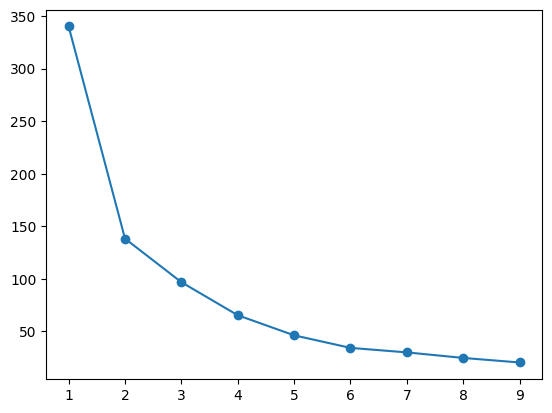

In [139]:
MSD = []
for i in range(1,10):
    kmean = KMeans(n_clusters=i)
    kmean.fit(df1)
    MSD.append(kmean.inertia_)
plt.plot(range(1,10),MSD,marker='o')

In [183]:
kmean = KMeans(n_clusters=2)

In [184]:
kmean.fit(df1)

C:\Users\somaa\SomaAdiENV\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [185]:
df1["clusters"] = kmean.fit_predict(df1)

C:\Users\somaa\SomaAdiENV\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [186]:
df1

,Eigenvector-centrality,betweenness-centrality,degree-centrality,closeness-centrality,Node-degree,page-rank,clustering-coefficient,effective-size,load-centrality,average-neighbor-degree,clusters
0,2.341089,4.253474,2.987091,2.006170,2.987091,3.100243,-1.228981,3.051464,4.258164,-1.449544,1
1,1.338579,0.107306,1.154803,0.828095,1.154803,1.076375,-0.693335,0.903374,0.119129,-1.048619,1
2,1.912290,1.076803,1.416559,1.870391,1.416559,1.269023,-0.953042,1.328165,1.137211,-0.823645,1
3,0.725182,-0.346833,0.369537,0.539384,0.369537,0.295799,0.280566,-0.158603,-0.324499,-0.531787,0
4,-0.788808,-0.468700,-0.415729,-0.664133,-0.415729,-0.340910,0.280566,-0.448234,-0.472763,-0.531787,0
5,-0.749459,-0.151485,-0.153974,-0.602033,-0.153974,-0.013688,-0.206385,-0.206875,-0.152798,-0.919411,0
6,-0.749459,-0.151485,-0.153974,-0.602033,-0.153974,-0.013688,-0.206385,-0.206875,-0.152798,-0.919411,0
7,0.274829,-0.475522,-0.153974,0.190364,-0.153974,-0.225718,1.254467,-0.641320,-0.479644,0.175057,0
8,0.906929,0.128811,0.107782,1.255147,0.107782,0.016218,-0.206385,-0.062060,0.082015,0.599164,0
9,-0.489737,-0.466362,-0.677485,0.108849,-0.677485,-0.692741,-1.667237,-0.351690,-0.471042,1.064313,0


silhouette score

In [187]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df1.drop("clusters",axis=1),df1["clusters"])

In [188]:
print(score)

0.6090331783751093
